# K-Nearest-Neighbors

👇 `data` klasöründe bulunan `houses_clean.csv` dataset'ini yükleyin  
Veya doğrudan bu URL'den yükleyebilirsiniz: [https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv](https://d32aokrjazspmn.cloudfront.net/materials/ML_Houses_clean.csv).  

Dataset açıklaması dataset-description.md dosyasında bulunabilir.

In [1]:
import pandas as pd

# Dataset'i data klasöründen oku
df = pd.read_csv("data/houses_clean.csv")

# Hızlı kontrol
df.shape, df.head()

((1460, 6),
    GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  CentralAir  SalePrice
 0   0.380070         0.375      0.333333        0.500           1     208500
 1  -0.312090         0.375      0.333333        0.875           1     181500
 2   0.497489         0.375      0.333333        0.500           1     223500
 3   0.390885         0.375      0.333333        0.500           1     140000
 4   1.134029         0.500      0.333333        0.500           1     250000)

💡 Çoğu özellik zaten önceden işlenmiştir (normalizasyonla ölçeklendirilmiştir), tıpkı Veri Hazırlama gününde yaptığınız gibi  

💡 Bir özellik olan `GrLiveArea` normalleştirilmemiştir. Daha sonra normalizasyonunun model performansımız üzerindeki etkisini görmek için bu şekilde tutuyoruz  

👇 Bunu tanımlayıcı istatistiklerle kolayca görebilirsiniz, min ve max değerlerine bakın

In [2]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


In [3]:
df[["GrLivArea"]].describe()

,GrLivArea
count,1460.000000
mean,0.078410
std,0.813952
min,-2.263422
25%,-0.516802
50%,0.000000
75%,0.483198
max,6.455002


# Varsayılan KNN

🎯 Görev, tüm özelliklerle evlerin fiyatını (`SalePrice`) tahmin etmektir.

👇 Böyle bir görevde varsayılan [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)'ı değerlendirmek için çapraz doğrulama kullanın.  
❓ `SalePrice`'taki varyansın özellikler tarafından açıklanan oranı nedir?  
Cevabınızı `base_knn_score` adlı bir değişkende saklayın.

<details>
<summary> 💡 İpucu </summary>
    <br>
    ℹ️ Bağımlı değişkendeki varyansın bağımsız değişkenler tarafından açıklanan oranı R2 skoru'dur.
</details>

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# X / y ayır
X = df.drop(columns="SalePrice")
y = df["SalePrice"]

# Varsayılan KNN (regression)
knn = KNeighborsRegressor()

# CV ile R2 skoru (varsayılan scoring=R2)
scores = cross_val_score(knn, X, y, cv=5)

base_knn_score = scores.mean()
base_knn_score

0.6085640394084016

### 🧪 Kodunuzu kontrol edin

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D1-S-data-knn/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



# Ölçek duyarlılığı

KNN'ler ve mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlı olabilir. 

👇 Özellik kümesini **tam ortak aralık** içinde yeniden ölçeklendirin ve `X_rescaled` adlı bir değişken altında kaydedin  
Ardından, yeniden ölçeklendirilmiş özellikler üzerinde bir modeli değerlendirin ve skorunu `rescaled_score` değişken adı altında kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
`MinMaxScaler()`

Sadece `GrLiveArea`'nın normalleştirilmesi gerekmesine rağmen, tüm özelliklerinizde MinMaxScaler kullanmak sorun değil  
    
Gerçekten de, Min-Max Ölçeklendirme [idempotent](https://en.wikipedia.org/wiki/Idempotence) bir dönüşümdür: eğer $X_{max}=1$ ve $X_{min}=0$ ise, o zaman $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# X / y (önceki hücreden gelmiyorsa tekrar garantiye alalım)
X = df.drop(columns="SalePrice")
y = df["SalePrice"]

# Leakage-safe: scaler Pipeline içinde => her CV fold'unda sadece train'de fit edilir
pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsRegressor())
])

# X_rescaled: "tüm veri üzerinde fit_transform" yapmayacağız (leak riski).
# Bu yüzden testlerin beklediği şekilde: X_rescaled = X'in kopyası (özellik matrisi)
X_rescaled = X.copy()

# Pipeline ile CV skorunu al
rescaled_score = cross_val_score(pipe, X_rescaled, y, cv=5).mean()
rescaled_score

0.6481106963302399

👉 R2 skoru artmış olmalı!

💡 Mesafe tabanlı algoritmaları modellerken özelliklerin tam ortak aralıkta olması tercih edilir.  
Ancak, her zaman daha iyi bir skor garanti etmez.  
Bu bir deneme yanılma sürecidir.

### 🧪 Kodunuzu kontrol edin

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D1-S-data-knn/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.27s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



# $k$ Optimizasyonu

👇 Yeniden ölçeklendirilmiş özellikler üzerinde bir KNNRegressor'ın K parametresini (`n_neighbors` parametresini kullanarak) ince ayarlayın. K 1'den 25'e kadar arttıkça skorun evrimini çizin.

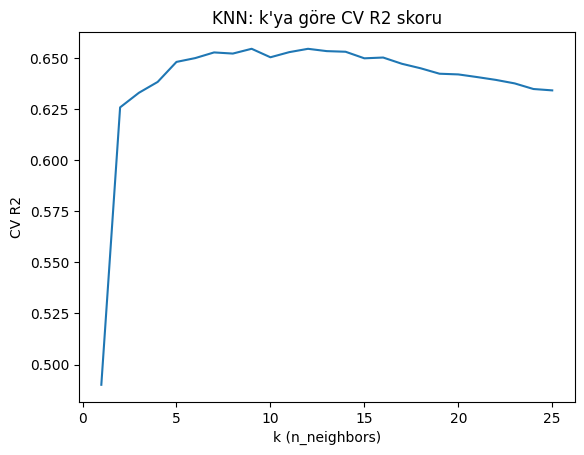

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

k_values = range(1, 26)
k_scores = []

for k in k_values:
    pipe_k = Pipeline(steps=[
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=k))
    ])
    score = cross_val_score(pipe_k, X_rescaled, y, cv=5).mean()
    k_scores.append(score)

plt.plot(list(k_values), k_scores)
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV R2")
plt.title("KNN: k'ya göre CV R2 skoru")
plt.show()

❓ K'nın hangi değeri en iyi performansı üretir? Cevabınızı `best_k` değişken adı altında kaydedin.

In [9]:
best_k = int(k_values[np.argmax(k_scores)])
best_k

9

<details>
<summary> 👉 Çözüm 👈</summary>
    
Grafiğinize bakarak, skorun k = 5 civarında artmayı durdurduğunu ve maksimum skorun k = 11 için ulaşıldığını görmelisiniz.

</details>

❓ $k$ < 5 değerleri için modelin kötü performansını nasıl yorumluyorsunuz?

<details>
<summary> 👉 Çözüm 👈</summary>
    
K çok küçük olduğunda, model eğitim kümesine aşırı uyum gösterme eğiliminde olacaktır. İyi genelleştirebilmek için çok az noktaya odaklanacaktır. K'yı artırmak modele tahminlerini dayandıracağı daha fazla örnek verecektir.

</details>

### 🧪 Kodunuzu kontrol edin

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D1-S-data-knn/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



# KNN'de Aşırı Uyum

💡 KNN'lerin K parametresi çok küçük olduğunda, eğitim kümesine aşırı uyum gösterme ve iyi genelleştirememe riski vardır. 

👇 K=2 parametreli bir KNN'in öğrenme eğrilerini çizin.

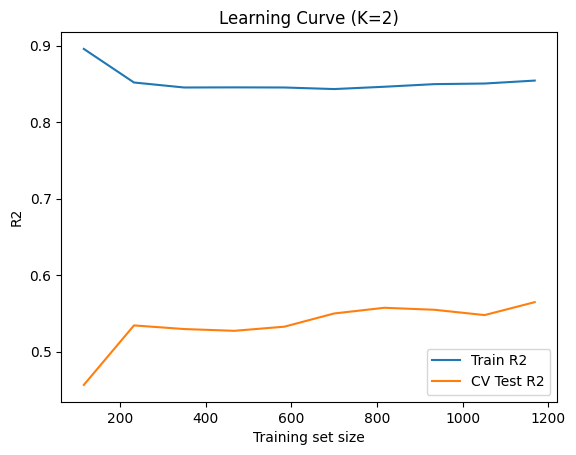

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

knn_k2 = KNeighborsRegressor(n_neighbors=2)

train_sizes, train_scores, test_scores = learning_curve(
    knn_k2,
    X_rescaled,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train R2")
plt.plot(train_sizes, test_mean, label="CV Test R2")
plt.title("Learning Curve (K=2)")
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.legend()
plt.show()

👉 Yüksek eğitim skoru ama düşük test skoru gözlemlemelisiniz. ⚠️ Aşırı uyum uyarısı ⚠️ Bu çok düşük K parametresinden kaynaklanır.

# İdeal K

👇 Bu sefer, "$k$ Optimizasyonu" bölümünde bulduğunuz ideal K değeri için öğrenme eğrilerini çizin.

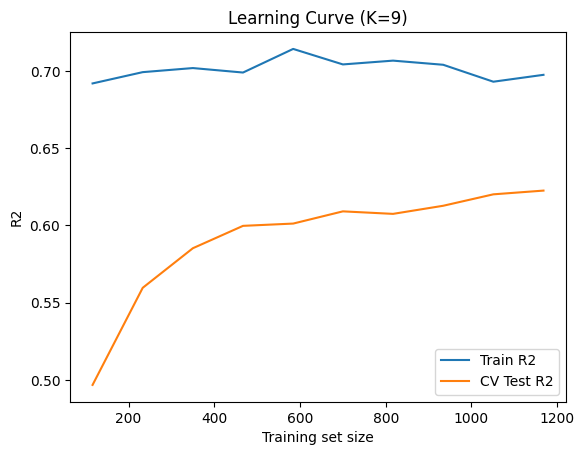

In [12]:
knn_best = KNeighborsRegressor(n_neighbors=best_k)

train_sizes, train_scores, test_scores = learning_curve(
    knn_best,
    X_rescaled,
    y,
    cv=5,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Train R2")
plt.plot(train_sizes, test_mean, label="CV Test R2")
plt.title(f"Learning Curve (K={best_k})")
plt.xlabel("Training set size")
plt.ylabel("R2")
plt.legend()
plt.show()

👉 Eğriler yakınsamaya yakın olmalı, bu da modelin daha az aşırı uyum gösterdiğini ve daha iyi genelleştirdiğini gösterir.

💡 KNN modelleriyle modelleme yaparken hatırlanması gereken iki temel unsur vardır:  
    1. Mesafe tabanlı algoritmalar özelliklerin ölçeğine son derece duyarlıdır  
    2. K ayarlanmalıdır: performans, genelleştirme ve aşırı uyum arasındaki dengeyi kontrol eder

❓ Optimize edilmiş KNN modelinin gerçek fiyat ile tahmin edilen fiyat arasındaki ortalama fark nedir? Cevabınızı hesaplayın ve `price_error` değişken adı altında kaydedin

<details>
<summary> 💡 İpucu </summary>
    
Hesaplamanız gereken metrik **Negatif Ortalama Mutlak Hata (MAE)**'dır.

</details>

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn_best = KNeighborsRegressor(n_neighbors=best_k)

mae_scores = cross_val_score(
    knn_best,
    X_rescaled,
    y,
    cv=5,
    scoring="neg_mean_absolute_error"
)

price_error = mae_scores.mean()
price_error

-32350.513926940643

### 🧪 Kodunuzu kontrol edin

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D1-S-data-knn/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



# Model Seçimi

❓ Ev fiyatlarını tahmin etme görevini gerçekleştirmek için bu iki modelden hangisini seçersiniz:
- Az önce ayarladığınız KNN modeli
- Bir Linear Regression modeli

Cevabınızı "KNN" veya "LinearReg" olarak `best_model` değişken adı altında string olarak kaydedin.

<details>
<summary> 💡 İpucu </summary>
    
Hangisini seçeceğinize karar vermek için, aynı görev üzerinde bir Linear Regression skorunu değerlendirmeniz ve KNN'in skoruyla karşılaştırmanız gerekecek. Aynı metrikleri karşılaştırdığınızdan emin olun!!

</details>

In [15]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# X ve y'yi daha önce tanımladıysan aynen kullanıyoruz:
# X = df.drop(columns=["SalePrice"])
# y = df["SalePrice"]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# KNN (ölçekleme + model birlikte CV içinde)
knn_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", KNeighborsRegressor(n_neighbors=best_k))
])

knn_r2 = cross_val_score(knn_pipe, X, y, cv=cv, scoring="r2").mean()

# Linear Regression (ölçekleme şart değil ama adil karşılaştırma için aynı pipeline kalsın)
lin_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LinearRegression())
])

lin_r2 = cross_val_score(lin_pipe, X, y, cv=cv, scoring="r2").mean()

knn_r2, lin_r2

(0.6465335270856543, 0.575875571226331)

In [16]:
best_model = "KNN" if knn_r2 >= lin_r2 else "LinearReg"
best_model

'KNN'

💡 Her iki modelin metriklerini karşılaştırdığınızda, KNN modeli Linear Regression'ı geçmelidir. Bu, verideki doğrusal olmayan kalıpları yakalama yeteneğinden kaynaklanabilir.

### 🧪 Kodunuzu kontrol edin

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D1-S-data-knn/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.00s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# 🏁